# Arbitrary Waveform Generator Lab
Tool for generating waveforms and writing them into one of the arbitrary waveform slots on the Juntek JDS2800 Signal Generator. For controlling the Juntek device, this code uses a very handy python API available at https://github.com/on1arf/jds6600_python. That code is written for the JDS6600 but seems to work with the JDS2800 also.

The basic concept is that you populate an array of integers and then pass that array to a function provided by the API. The length of the array is exactly WF_LEN and the values can range from 0 to LINE_VALUE. After you populate the array using one of the cells below, use the last cell in the notebook to write the current array to the device.

In [14]:
from math import sin, pi
import matplotlib.pyplot as plt
from jds6600 import jds6600

LINE_VALUE = 4095  # Max value that can go in the waveform array
WF_LEN = 2048  # Max number of values that can go in the waveform array

# All the following cells should populate this array since this is what gets written to the device
wf = [0] * WF_LEN

## Three frequency signal
Generate a signal consisting of sine waves at three different frequencies

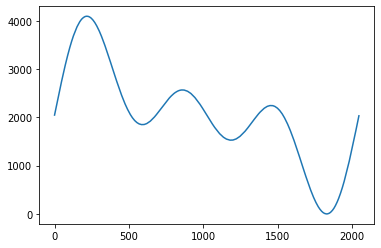

In [10]:
# Temporary array we use for floating point calculations until we convert to integer
twf = [0] * WF_LEN

# To get a smooth curve, use a step size of 2 pi radians divided by the maximum number
# of entries in the waveform
step_size = 2 * pi / WF_LEN
for ii in range(WF_LEN):
    x = step_size * ii
    val = (
        sin(x) + sin(2 * x) + sin(3 * x)
    )  # No significance to this equation. Use any you like
    twf[ii] = val

# Normalize and scale to 0 - LINE_VALUE
min_value = min(twf)
for ii in range(WF_LEN):
    twf[ii] = twf[ii] - min_value
max_value = max(twf)
scale = LINE_VALUE // max_value
for ii in range(WF_LEN):
    wf[ii] = round(twf[ii] * scale)
    
# Plot the waveform to see if we are happy with it
%matplotlib inline
assert(len(wf) == WF_LEN)
plt.plot(wf)

## Generate an SOS waveform

pos = 1920


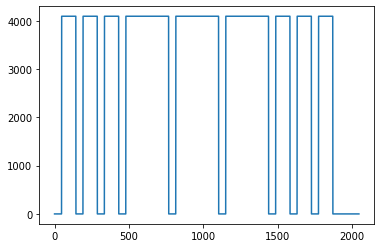

In [29]:
# Lengths of the dots and dashes in the Morse code
SCALE_FACTOR = 12
DAH_LENGTH = 24 * SCALE_FACTOR
DIT_LENGTH = 8 * SCALE_FACTOR
SPACE_LENGTH = 4 * SCALE_FACTOR

pos = 0

def space():
    global pos
    for ii in range(SPACE_LENGTH):
        wf[pos] = 0
        pos += 1

def dit():
    global pos
    for ii in range(DIT_LENGTH):
        wf[pos] = LINE_VALUE
        pos += 1
    space()

def dah():
    global pos
    for ii in range(DAH_LENGTH):
        wf[pos] = LINE_VALUE
        pos += 1
    space()

def S():
    dit()
    dit()
    dit()

def O():
    dah()
    dah()
    dah()

space()
S()
O()
S()
print(f'pos = {pos}')
    
# Plot the waveform to see if we are happy with it
%matplotlib inline
assert(len(wf) == WF_LEN)
plt.plot(wf)

## Write the current contents of the wf array to the device
You will need to set the USB string and the slot number for the waveform
TODO - Put in fancy Jupyter GUI controls for those two values

In [30]:
SG_SERIAL_PORT = "/dev/ttyUSB1"  # Sometimes this is 0, sometimes 1
WF_SLOT = 15  # Arbitrary waveform slot # to write to

sg = jds6600(SG_SERIAL_PORT)
sg.arb_setwave(WF_SLOT, wf)